### Step 4: continued analysis

Continuing step 4, we have seen in the last plot that the pricing strategy for the customers of class 1 and 2, we have aggregated them into a single class type of customer.
These are the snippets of code and results with plots.

### Main for the experiment for Step 4.2

In [2]:
import numpy as np
from environment import Environment
from learners.ucb_learner import UCB1
from learners.ts_learner import TS_Learner

env = Environment()
n_arms = 13
ucb1_learner_c0 = UCB1(n_arms = n_arms)
ucb1_learner_c12 = UCB1(n_arms = n_arms)
ts_learner_c0 = TS_Learner(n_arms = n_arms)
ts_learner_c12 = TS_Learner(n_arms = n_arms)

T = 365
opt_bids = [3.8622484787564275 , 2.1216094606111944,  2.347134281066495]
opt_price = 6.321089806558111
regret_c0_ucb = []
regret_c12_ucb = []
regret_c0_ts = []
regret_c12_ts = []

# bids for this task has to be the optimal ones
bids = opt_bids 
prices = np.linspace(3.0, 15.0, n_arms)

price_ev_per_day_ucb = []
price_ev_per_day_ts = []

for day in range(T):
    #UCB1 learner
    price_c0_idx = ucb1_learner_c0.pull_arm()
    price_c0 = prices[price_c0_idx]
    price_c12_idx = ucb1_learner_c12.pull_arm()
    price_c12 = prices[price_c12_idx]
    
    reward_per_day = []
    price = [price_c0, price_c12]
    for i in range(len(price)):
        if i == 0 : 
            p = price[0]
            reward = env.round(bids, p)
            reward_per_day.append(reward[0])
        else :
            p = price[i]
            reward = env.round(bids, p)
            reward_per_day.append(reward[1]+reward[2])
            

    ucb1_learner_c0.update(price_c0_idx, reward_per_day[0])
    ucb1_learner_c12.update(price_c12_idx, reward_per_day[1])
    
    reward_optimal = env.round(opt_bids, opt_price, noise= False)
    regret_c0 = reward_optimal[0] - reward_per_day[0]
    regret_c12 = (reward_optimal[1]+reward_optimal[2]) - reward_per_day[1]
    regret_c0_ucb.append(regret_c0)
    regret_c12_ucb.append(regret_c12)
    
    price_ev_per_day_ucb.append(price)

    #TS learner
    price_c0_idx = ts_learner_c0.pull_arm()
    price_c0 = prices[price_c0_idx]
    price_c12_idx = ts_learner_c12.pull_arm()
    price_c12 = prices[price_c12_idx]
    
    reward_per_day = []
    price = [price_c0, price_c12]
    for i in range(len(price)):
        if i == 0 : 
            p = price[i]
            reward = env.round(bids, p)
            reward_per_day.append(reward[0])
        else :    
            p = price[1]
            reward = env.round(bids, p)
            reward_per_day.append(reward[1]+reward[2])
        

    ts_learner_c0.update(price_c0_idx, reward_per_day[0])
    ts_learner_c12.update(price_c12_idx, reward_per_day[1])
    
    reward_optimal = env.round(opt_bids, opt_price, noise= False)
    regret_c0 = reward_optimal[0] - reward_per_day[0]
    regret_c12 = (reward_optimal[1]+reward_optimal[2]) - reward_per_day[1]
    regret_c0_ts.append(regret_c0)
    regret_c12_ts.append(regret_c12)
    
    price_ev_per_day_ts.append(price)

## Plots

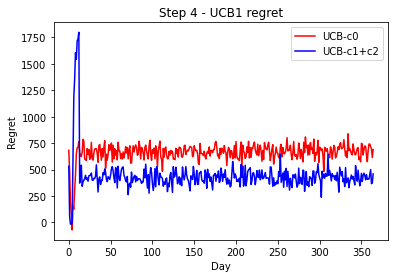

In [3]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.xlabel("Day")
plt.ylabel("Regret")
plt.plot(regret_c0_ucb,'r', label="UCB-c0")
plt.plot(regret_c12_ucb, 'b', label="UCB-c1+c2")
plt.title("Step 4 - UCB1 regret")
plt.legend()
plt.show()

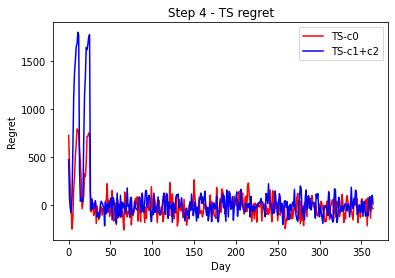

In [4]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.xlabel("Day")
plt.ylabel("Regret")
plt.plot(regret_c0_ts,'r', label="TS-c0")
plt.plot(regret_c12_ts, 'b', label="TS-c1+c2")
plt.title("Step 4 - TS regret")
plt.legend()
plt.show()


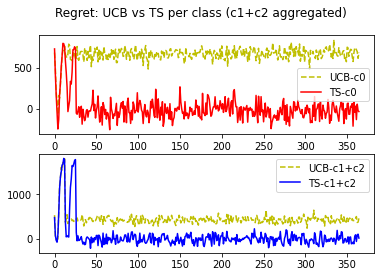

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
fig.suptitle('Regret: UCB vs TS per class (c1+c2 aggregated)')
axs[0].plot(regret_c0_ucb,'y', label="UCB-c0", linestyle="dashed")
axs[0].plot(regret_c0_ts,'r', label="TS-c0")
axs[0].legend()
axs[1].plot(regret_c12_ucb,'y', label="UCB-c1+c2", linestyle="dashed")
axs[1].plot(regret_c12_ts,'b', label="TS-c1+c2")
axs[1].legend()

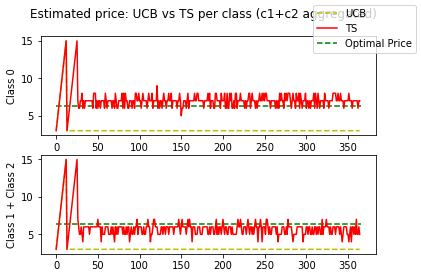

In [6]:
import matplotlib.pyplot as plt

YY_ucb = np.array(price_ev_per_day_ucb) 
YY_ts = np.array(price_ev_per_day_ts)
fig, axs = plt.subplots(2)
fig.suptitle('Estimated price: UCB vs TS per class (c1+c2 aggregated)')
axs[0].plot(YY_ucb[:,0],'y', linestyle="dashed")
axs[0].plot(YY_ts[:,0],'r')
axs[0].hlines(opt_price, 0, 365, 'g', linestyles='dashed')
axs[0].set(ylabel="Class 0")
axs[1].plot(YY_ucb[:,1],'y', linestyle="dashed")
axs[1].plot(YY_ts[:,1],'r')
axs[1].hlines(opt_price, 0, 365, 'g', linestyles='dashed')
axs[1].set(ylabel="Class 1 + Class 2")
fig.legend(["UCB","TS","Optimal Price"])